<a href="https://colab.research.google.com/github/RicardxJMG/Data-projects/blob/main/Data%20Science%20Projects/Credit%20Card%20Clustering/Clustering_Tarjeta_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentación de clientes

En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

---

La descripción de cada variable del conjunto de datos está descrito en la siguiente página:

| Atributo                             | Descripción                                                                                  |
|-------------------------------------|----------------------------------------------------------------------------------------------|
| `CUST_ID`                           | Identificación del titular de la tarjeta de crédito (Categórico)                            |
| `BALANCE`                           | Cantidad de saldo restante en su cuenta para hacer compras                                  |
| `BALANCE_FREQUENCY`                 | Con qué frecuencia se actualiza el saldo (0 = baja frecuencia, 1 = alta frecuencia)         |
| `PURCHASES`                         | Cantidad de compras realizadas desde la cuenta                                              |
| `ONEOFF_PURCHASES`                  | Monto máximo de una compra realizada en una sola vez                                        |
| `INSTALLMENTS_PURCHASES`           | Cantidad de compras realizadas a plazos                                                     |
| `CASH_ADVANCE`                      | Adelanto de efectivo proporcionado por el usuario                                           |
| `PURCHASES_FREQUENCY`              | Frecuencia de compras realizadas (0 = baja frecuencia, 1 = alta frecuencia)                 |
| `ONEOFF_PURCHASES_FREQUENCY`       | Frecuencia de compras realizadas en una sola vez (0 = baja, 1 = alta)                       |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Frecuencia de compras a plazos (0 = baja, 1 = alta)                                         |
| `CASH_ADVANCE_FREQUENCY`           | Frecuencia con la que se paga el adelanto de efectivo                                       |
| `CASH_ADVANCE_TRX`                 | Número de transacciones realizadas con adelanto de efectivo                                 |
| `PURCHASES_TRX`                    | Número de transacciones de compra realizadas                                                |
| `CREDIT_LIMIT`                     | Límite de crédito de la tarjeta para el usuario                                             |
| `PAYMENTS`                         | Cantidad de pagos realizados por el usuario                                                 |
| `MINIMUM_PAYMENTS`                 | Monto mínimo de pagos realizados por el usuario                                             |
| `PRC_FULL_PAYMENT`                 | Porcentaje del pago total realizado por el usuario                                          |
| `TENURE`                           | Antigüedad del servicio de la tarjeta de crédito para el usuario (meses)                    |


## 1. Explorando los datos.


In [ ]:
import pandas as pd
dataset = pd.read_csv('CC GENERAL.csv', sep = ',')

In [ ]:
dataset.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Borramos los atributos que no nos interesan como `CUST_ID`

In [ ]:
dataset.drop(columns=['CUST_ID'], inplace=True)
dataset.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Notamos que existen elementos nulos en el conjunto de datos en las columnas `MINIMUM_PAYMENTS` y `CREDIT_LIMIT`.

In [ ]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 2. Análisis Exploratorio

In [ ]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt


sns.set_theme(style="ticks", palette="twilight_r")
rcParams["legend.title_fontsize"] = 10


def plot_scatter(df, x, y, **kwargs):
    fig, ax = plt.subplots(figsize=(10, 4))

    sns.scatterplot(data=df, x=x,y=y, hue=kwargs.get("hue", None),ax=ax)
    ax.set_title(kwargs.get("title", ""), fontsize=14)
    ax.set_xlabel(kwargs.get("x_label", x), fontsize=12)
    ax.set_ylabel(kwargs.get("y_label", y), fontsize=12)
    ax.tick_params(labelsize=9)

    if kwargs.get("hue"):
        ax.legend(fontsize=9,bbox_to_anchor=(1.05, 0.75),loc=2,title=kwargs.get("hue_title", kwargs.get("hue")))

    plt.tight_layout()
    plt.show()


def plot_bar_summary(df,x,y,**kwargs):
  var_summary = df.groupby(x).agg(min = (y, "min"),
                                                mean = (y, "mean"),
                                                max = (y, "max")).reset_index().melt(id_vars=x, var_name="type", value_name = y)

  fig, ax = plt.subplots(figsize=(10, 4))
  bars = sns.barplot(data=var_summary, x=x, y=y, hue="type", ax=ax)
  ax.set_title(kwargs.get("title", ""), fontsize=14)
  ax.set_xlabel(kwargs.get("x_label", x), fontsize=12)
  ax.set_ylabel(kwargs.get("y_label", y), fontsize=12)
  ax.tick_params(labelsize=9)

  ax.legend(fontsize=9,bbox_to_anchor=(1.05, 0.75),loc=2,title=kwargs.get("hue_title",""))

  y_lim = []
  for bar in bars.patches:
      pos_x = bar.get_x() + bar.get_width() / 2
      pos_y = bar.get_height()
      offset = kwargs.get("offset", 500)
      value = f'{pos_y:,.0f}'.replace(',','.')

      if pos_y > 1:
        ax.text(x = pos_x, y = pos_y + offset, s = value, ha='center', fontsize=9, rotation = 90)
        y_lim.append(pos_y + offset)


  ax.set_ylim(0,max(y_lim)+kwargs.get("ylim_plus", 5000))
  plt.tight_layout()
  plt.show()

### Saldo disponible de los usuarios

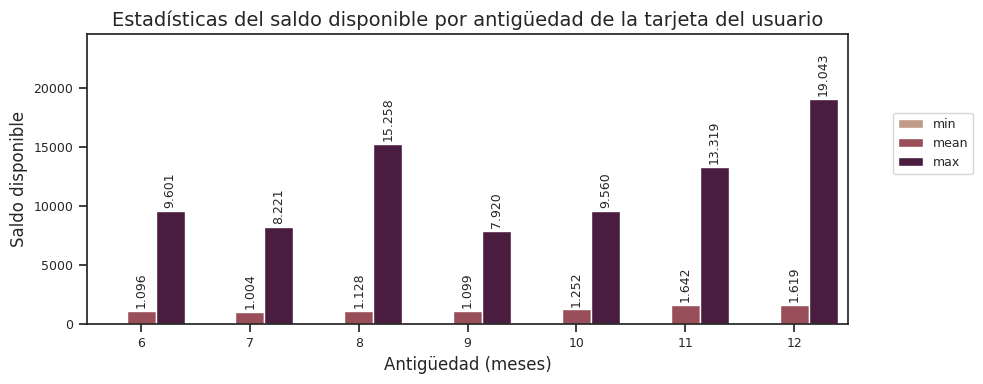

In [ ]:
plot_bar_summary(dataset, "TENURE", "BALANCE", **{"x_label": "Antigüedad (meses)",
                                                  "y_label":"Saldo disponible",
                                                  "title": "Estadísticas del saldo disponible por antigüedad de la tarjeta del usuario"})

#### Saldo disponible vs Compras

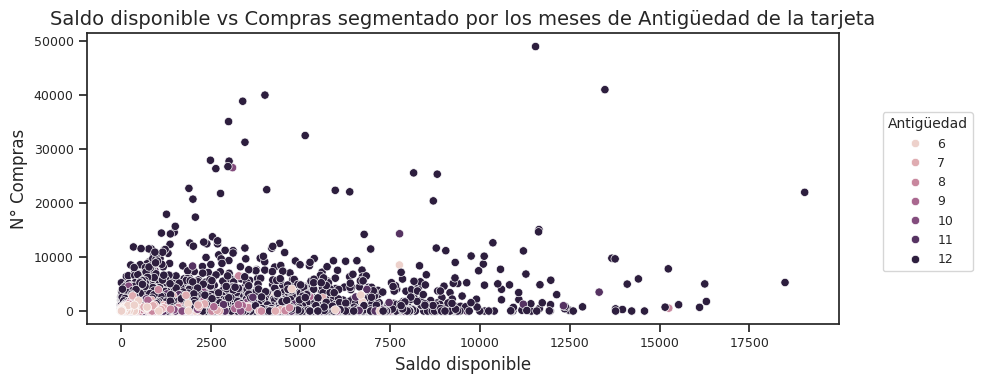

In [ ]:
dict_dea1 = {"title": "Saldo disponible vs Compras segmentado por los meses de Antigüedad de la tarjeta",
             "x_label": "Saldo disponible",
             "y_label": "N° Compras",
             "hue": "TENURE",
             "hue_title": "Antigüedad"}

plot_scatter(dataset, "BALANCE", "PURCHASES", **dict_dea1)

#### Saldo disponible vs Límite de Crédito

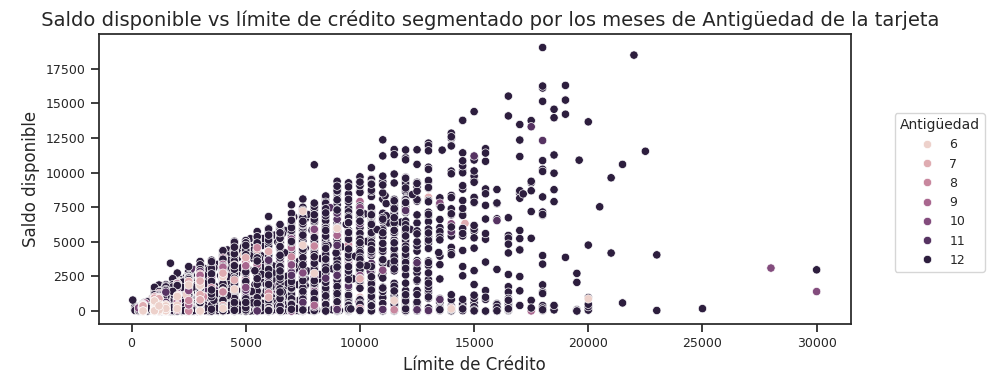

In [ ]:
dict_dea2 = {"title": "     Saldo disponible vs límite de crédito segmentado por los meses de Antigüedad de la tarjeta",
             "x_label": "Límite de Crédito",
             "y_label": "Saldo disponible",
             "hue": "TENURE",
             "hue_title": "Antigüedad"}

plot_scatter(dataset, "CREDIT_LIMIT", "BALANCE", **dict_dea2)

### Numero de compras de los usuarios

#### Resumen estadístico del número de compras de los usuarios

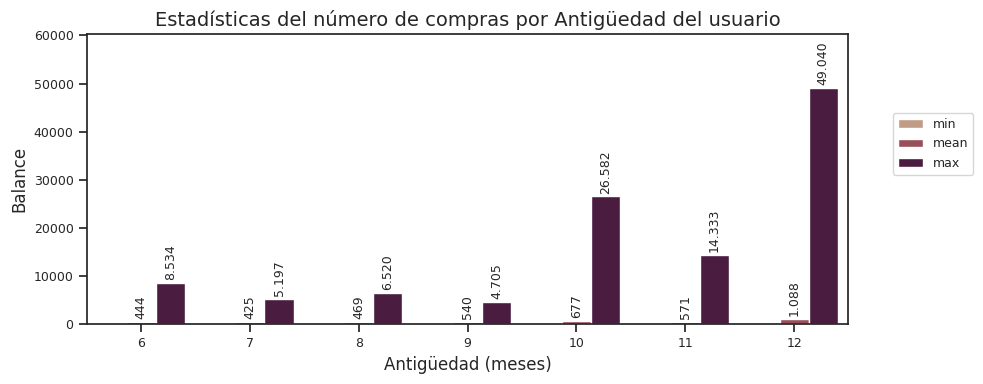

In [ ]:
plot_bar_summary(dataset, "TENURE", "PURCHASES", **{"x_label": "Antigüedad (meses)",
                                                    "y_label":"Balance",
                                                    "title": "Estadísticas del número de compras por Antigüedad del usuario",
                                                    "offset": 1200,
                                                    "ylim_plus": 10000})

#### Límite de crédito vs número de compras

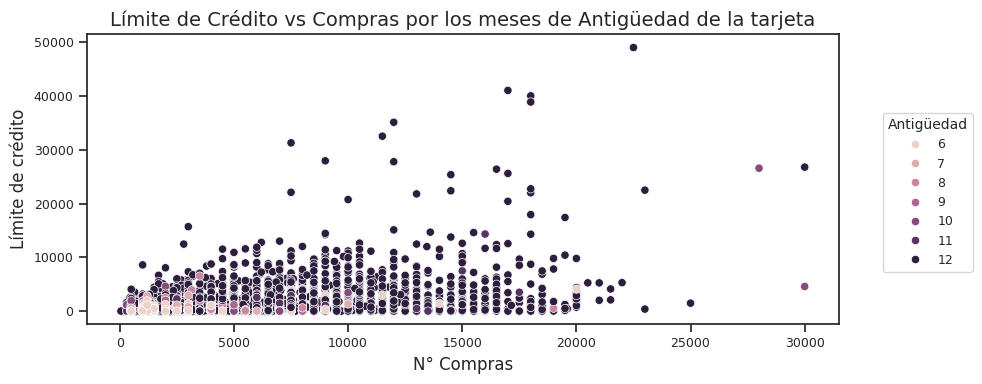

In [ ]:
dict_dea3 = {"title": "Límite de Crédito vs Compras por los meses de Antigüedad de la tarjeta",
             "x_label": "N° Compras",
             "y_label": "Límite de crédito",
             "hue": "TENURE",
             "hue_title": "Antigüedad"}

plot_scatter(dataset,  "CREDIT_LIMIT", "PURCHASES",**dict_dea3)

### Cantidad de pagos de los usuarios.

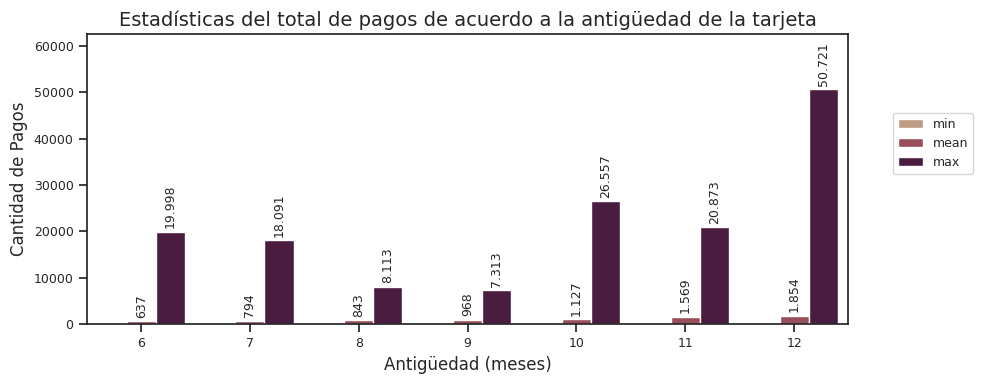

In [ ]:
plot_bar_summary(dataset, "TENURE", "PAYMENTS", **{"x_label": "Antigüedad (meses)",
                                                    "y_label":"Cantidad de Pagos",
                                                    "title": "Estadísticas del total de pagos de acuerdo a la antigüedad de la tarjeta",
                                                    "offset": 1400,
                                                    "ylim_plus": 10500})

#### Cantidad de pagos vs Adelantos con Efectivos

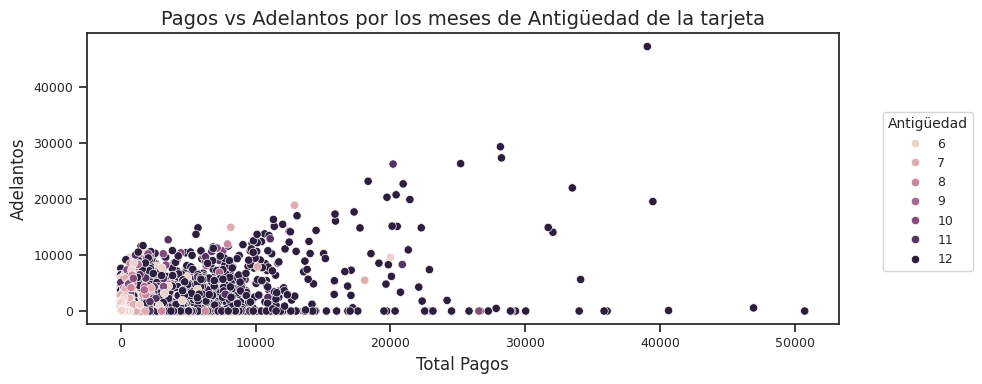

In [ ]:
dict_dea3 = {"title": "Pagos vs Adelantos por los meses de Antigüedad de la tarjeta",
             "x_label": "Total Pagos",
             "y_label": "Adelantos",
             "hue": "TENURE",
             "hue_title": "Antigüedad"}

plot_scatter(dataset,  "PAYMENTS", "CASH_ADVANCE",**dict_dea3)

### Distribución de los datos

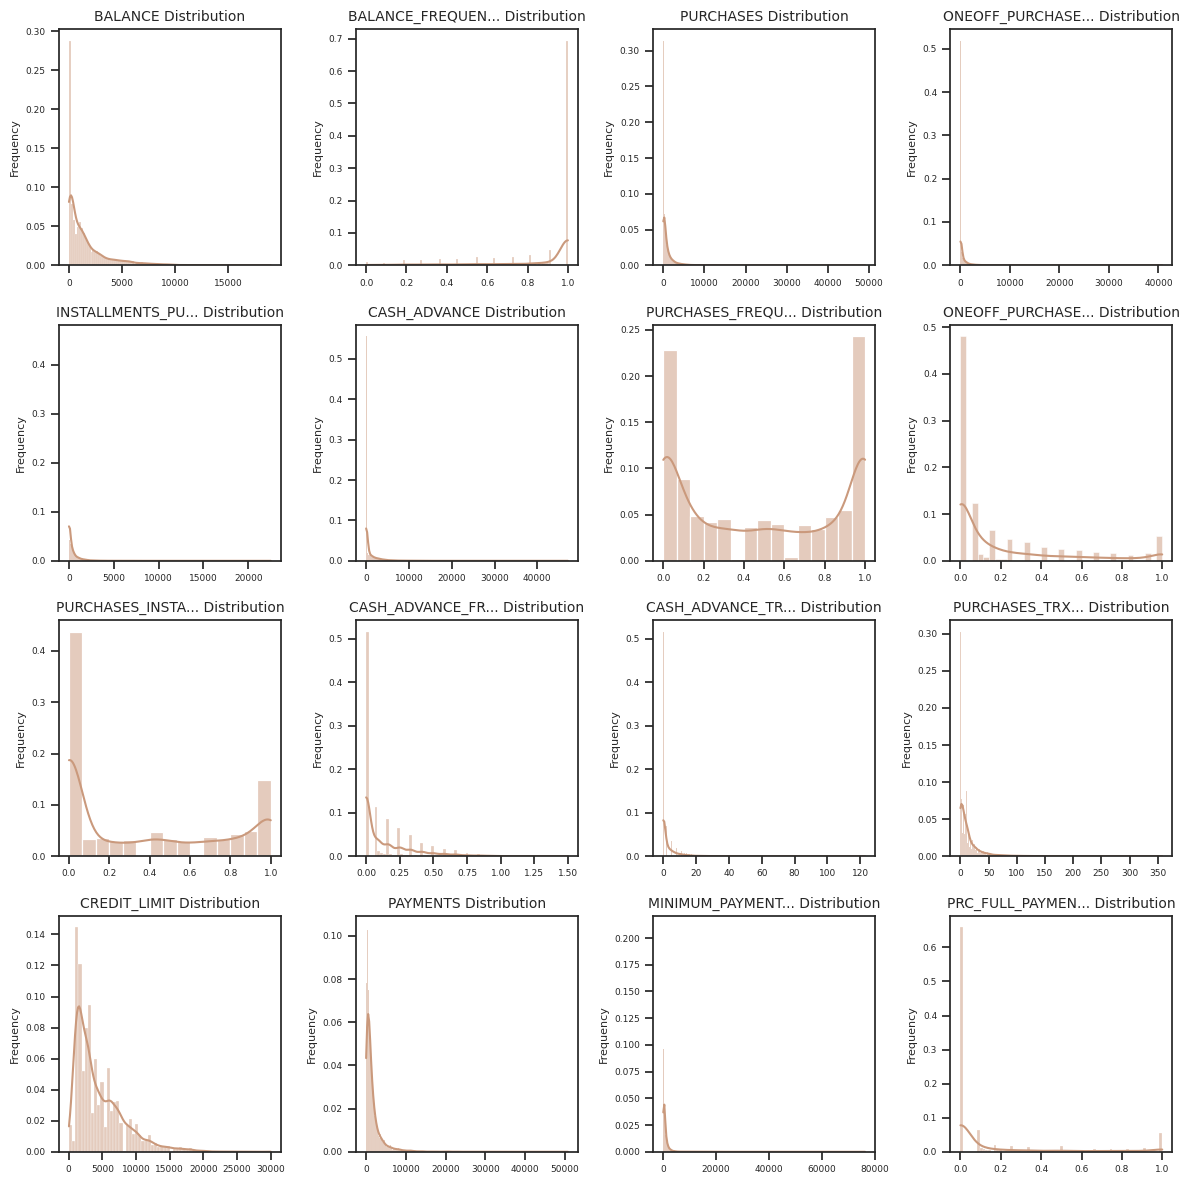

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

for n, (col, ax) in enumerate(zip(dataset.columns, axes.flatten())):
    sns.histplot(data=dataset, x=col, kde=True, stat='probability', ax=ax)
    ax.set_title(f'{col if len(col) <= 12 else col[0:15] + "..."} Distribution', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency', fontsize=8)
    ax.tick_params(labelsize=6.45)

plt.tight_layout()
plt.show()

Notamos presencia fuerte de outliers en los siguientes atributos:

- `BALANCE`
- `PURCHASES`
- `ONEOFF_PURCHASES`
- `INSTALLMENTS_PURCHASES`
- `CASH_ADVANCE`
- `PAYMENTS`
- `CREDIT_LIMIT`
- `CASH_ADVANCE_TRX`
- `PURCHASES_TRX`

Adicionamente observamos un ligero desajuste en `CASH_ADVANCE_FREQUENCY` el cual será ajustado.


In [ ]:
dataset.loc[dataset.query('CASH_ADVANCE_FREQUENCY > 1', engine='python').index, "CASH_ADVANCE_FREQUENCY"] = 1
dataset.query('CASH_ADVANCE_FREQUENCY > 1', engine='python').shape

(0, 17)

## 3. Preprocesamiento

### Corrección de valores

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
# Elementos que tienen un total de pagos igual a cero y por tanto pagos mínimos nulos
dataset.loc[dataset.query('PAYMENTS == 0 and MINIMUM_PAYMENTS.isnull()', engine='python').index, ["MINIMUM_PAYMENTS"]].shape[0]

240

Como `CREDIT_LIMIT` tiene un único valor nulo, lo eliminaremos. Para `MINIMUM_PAYMENTS` procederemos de la siguiente forma:
1. Si `PAYMENTS==0`, entonces `MINIMUM_PAYMENTS = 0`,
2. Si `PAYMENTS` es mayor a 0 y menor a la media de `PAYMENTS`, entonces `MINIMUM_PAYMENTS = PAYMENT`
3. Caso contrario a 2. `MINIMUM_PAYMENTS = MEDIAN(PAYMENTS)`


In [ ]:
median_payments = dataset.PAYMENTS.median()
dataset.loc[dataset.query('PAYMENTS == 0 and MINIMUM_PAYMENTS.isnull()', engine='python').index, "MINIMUM_PAYMENTS"] = 0
dataset.loc[dataset.query('PAYMENTS > 0 and PAYMENTS < @median_payments', engine='python').index, "MINIMUM_PAYMENTS"] = dataset.PAYMENTS
dataset.loc[dataset.query('PAYMENTS > @median_payments', engine = 'python').index, "MINIMUM_PAYMENTS"] = median_payments

dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

In [ ]:
dataset.loc[dataset.query('PAYMENTS == 0 and MINIMUM_PAYMENTS.isnull()', engine='python').index, "MINIMUM_PAYMENTS"].shape[0]

0

Los pagos mínimos nulos han sido corregidos

### Estandarización de los datos

Escalaremos el conjunto de datos con StandardScaler, es decir, cada valor de un atributo será restado por la media y divida por la desviación estándar. Esto con el fín de obtener una mejor distribución de los datos.


In [ ]:
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(StandardScaler().fit_transform(dataset.values))

### Reducción de dimensionalidad usando PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X)


explained_variance = pca.explained_variance_ratio_
cummulative_variance = pca.explained_variance_ratio_.cumsum()

print('Varianza explicada:\n\n',explained_variance.round(4))
print('\nVarianza cumulativa:\n\n',cummulative_variance.round(4))

Varianza explicada:

 [0.2824 0.2059 0.0873 0.0729 0.0625 0.0565 0.0481 0.0402 0.0329 0.0307
 0.023  0.0188 0.0146 0.0114 0.0102 0.0027 0.    ]

Varianza cumulativa:

 [0.2824 0.4883 0.5756 0.6485 0.711  0.7675 0.8156 0.8557 0.8887 0.9194
 0.9423 0.9611 0.9758 0.9871 0.9973 1.     1.    ]


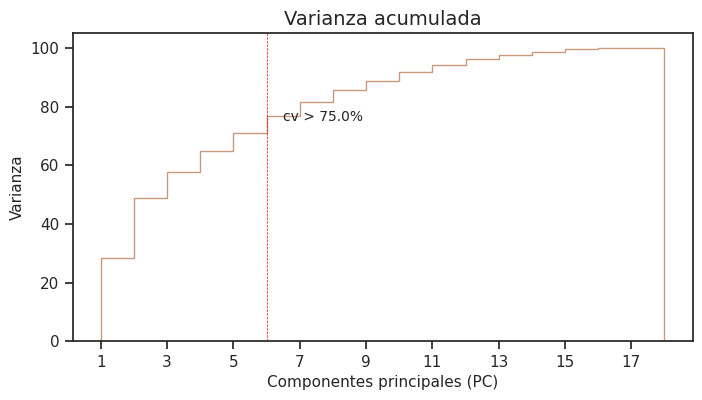

In [ ]:
va_select = 0.75
va_value =  np.array(cummulative_variance)[np.where(cummulative_variance >= va_select)]
index = cummulative_variance.tolist().index(va_value[0]) + 1
edges = np.arange(1, len(cummulative_variance) +2)

plt.figure(figsize=(8, 4))

plt.stairs(cummulative_variance*100, edges ,label = 'Varianza cumulativa')
plt.title('Varianza acumulada', fontsize = 14)
plt.xlabel('Componentes principales (PC)', fontsize = 11)
plt.ylabel('Varianza', fontsize = 11)
plt.axvline(index,linestyle = '--', color = 'r', lw = 0.5)
plt.annotate(f"cv > {100*va_select}%", xy = (index+0.5,va_select*100), fontsize = 10)
plt.xticks(np.arange(1, len(cummulative_variance) + 2, 2))



plt.show()

Del grafico anterior notamos que no se produce el "codo", es decir, que a partir de las primeremas componentes se obtenga un incremento significativo de la varianza acumulada. En este caso se trazó una linea donde se obtiene una varianza acumulada del 75% de la variación total.

In [ ]:
print(f"Se obtiene una varianza acumulada del {va_select*100} en las principales {index} componentes")

Se obtiene una varianza acumulada del 75.0 en las principales 6 componentes


Por lo tanto, para el clustering usaremos las primeras 6 componentes principales en lugar de las 17 originales.

In [ ]:
pca = PCA(n_components=va_select)
X_pca = pca.fit_transform(X)

X_pca = pd.DataFrame(X_pca,
                      columns = ["PC{}".format(i+1) for i in range(X_pca.shape[1])])
X_pca.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.028086,-1.138339,-0.673065,0.331399,-0.491519,-0.659086
1,-0.751116,2.756095,-0.427040,0.204834,1.419594,-0.064837
2,0.941352,-0.441942,-0.059024,1.741006,-0.983077,1.603899


## 4. Clustering

### Métricas de selección de clusters

Para seleccionar el mejor número de clusters, se deben tener en cuenta las siguientes métricas de evaluación:

---

**Silhouette Score**:  Evalúa qué tan similar es un punto a su propio cluster comparado con otros.

$$
s = \frac{b - a}{\max(a, b)}
$$

- $ a $: distancia media del punto a los demás puntos de su propio cluster.  
- $ b $: distancia media del punto al cluster más cercano.


Esta métrica nos dice qué tan cerca están los puntos de su propio clúster (compacidad) y qué tan lejos están de otros clusteres (separación). *El valor debe estar entre -1 y 1. Cuanto más cercano a 1, mejor separación entre clusters.*

---

 **Davies-Bouldin Index (DBI)**:
Mide la media de la relación entre la dispersión intra-cluster y la distancia inter-cluster.

$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{S_i + S_j}{M_{ij}} \right)
$$

- $ S_i $: dispersión del cluster $i$ (ej. desviación promedio intra-cluster).  
- $ M_{ij} $: distancia entre los centroides de los clusters $i$ y $j$.

Esta métrica nos dice qué tan parecidos (poco separados) están los clústeres entre sí, considerando la dispersión interna de cada uno. *Cuanto más bajo el valor, mejor (idealmente cercano a 0).*

---

 **Calinski-Harabasz Index (CH)** : Evalúa la proporción entre la dispersión entre clusters y dentro de los clusters.

$$
\text{CH} = \frac{\text{tr}(B_k)}{\text{tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

- $ \text{tr}(B_k) $: dispersión entre clusters (suma de cuadrados entre grupos).  
- $ \text{tr}(W_k) $: dispersión dentro de los clusters (suma de cuadrados dentro de grupos).  
- $ n $: total de observaciones.  
- $ k $: número de clusters.

En términos simples, esta métrica indica la relación entre la varianza entre clústeres (separación) y la varianza dentro de los clústeres (compacidad). *Cuanto mayor, mejor separación entre clusters.*


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

def table_metrics(vals):
  scores= []

  for s in range(2,16):
    score={}
    kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300, random_state=123)
    y_pred = kmeans.fit_predict(vals)
    labels = kmeans.labels_
    score['N_Clusters'] = s
    score['Inertia'] = kmeans.inertia_
    score['Silhouette'] = metrics.silhouette_score(vals, labels, metric='euclidean')
    score['Davies-Bouldin'] = metrics.davies_bouldin_score(vals, labels)
    score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(vals, labels)
    scores.append(score)

  table = pd.DataFrame(scores)
  return table

def plot_metrics(table):
  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

  for n, (col, ax) in enumerate(zip(table.drop(columns=['N_Clusters']).columns, axes.flatten())):
      best_score = min(table[col]) if col == "Davies-Bouldin" else max(table[col])
      sns.lineplot(data=table, x='N_Clusters', y=col, ax=ax, marker='o',  markersize=8)
      ax.set_title(f'{col} Score', fontsize=14)
      ax.set_xlabel('Number of Clusters', fontsize =11)
      ax.set_ylabel('')
      if col != "Inertia":
        ax.axhline(best_score,linestyle = '--', color = 'r', lw = 0.65)
      ax.tick_params(labelsize=8)

  plt.tight_layout()
  plt.show()

### Clustering con KMeans

In [ ]:
table = table_metrics(X_pca)
table.round(4)

,N_Clusters,Inertia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,2,91984.3796,0.2574,1.6089,2409.9928
1,3,75178.6858,0.2708,1.3093,2474.0963
2,4,63013.5625,0.2588,1.2621,2543.2346
3,5,56227.8544,0.2477,1.2782,2407.2211
4,6,51105.0734,0.2387,1.3061,2297.8732
5,7,46756.1387,0.2544,1.2098,2231.4195
6,8,43030.9372,0.2291,1.2407,2188.5815
7,9,39346.9975,0.2516,1.2160,2198.6608
8,10,37339.9235,0.2429,1.2162,2112.5723
9,11,35514.1495,0.2443,1.2510,2044.7824


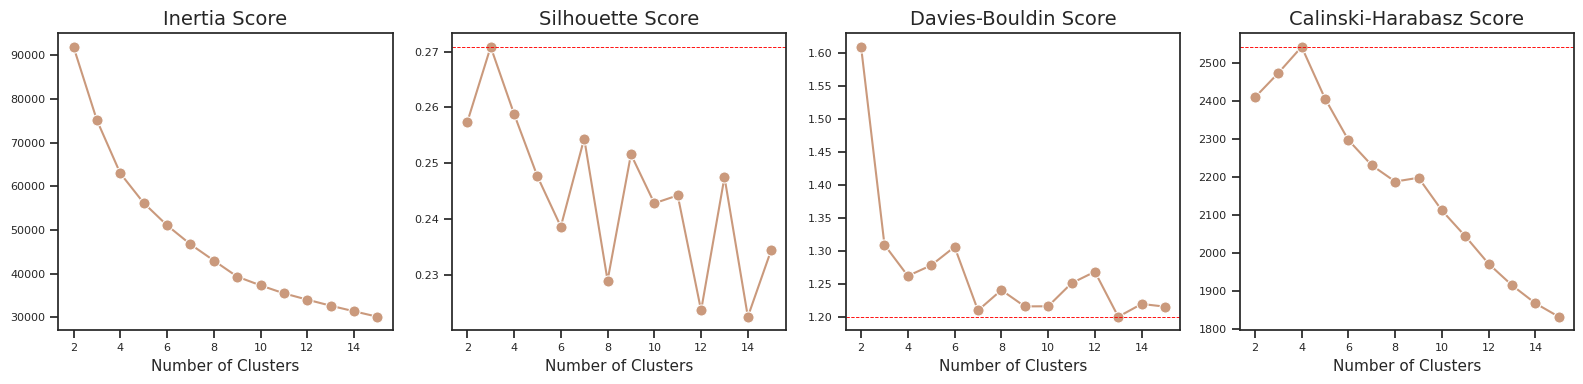

In [ ]:
plot_metrics(table)

De acuerdo a las métricas tenemos los posibles candidatos en para el número de clusters:

|Métrica|Valor| N\_cluster|
|:-----:|:-----:|:--------:|
|Silhouette|0.270841	|3|
|Davies-Bouldin|1.2003|13|
|Calinski-Harabasz|2543.2346|4|

En el caso de la métrica de inercia, los número de clusteres que podríamos tomar usando esta métrica son entre 5, 6 y 7.


#### Selección del número de los clusters

Con base en la tabla anterior tenemos tres distintos valores a seleccionar de clusters. Observamos que

- Con **Silhouette**, usando tres clústeres, se obtienen grupos con una separación moderada. Es un valor aceptable considerando que se utilizaron seis componentes principales. Además, con este número de clústeres es más fácil interpretar los resultados para segmentar a los clientes en distintos grupos.

- Con **Davies-Bouldin**, utilizando trece clústeres, los grupos son relativamente compactos y bien separados. El valor obtenido es bueno, aunque computacionalmente puede ser más costoso que las otras opciones.

- Con **Calinski-Harabasz**, con cuatro clústeres, se obtiene un valor alto. Esto indica que los clústeres están bien separados y son compactos, por lo que segmentar a los clientes en distintos grupos sería efectivo con este número.

---

En base a lo anterior, se ha decididó tomar **4 clusters**. Las razones de esta decición son las siguientes:

- Es el numéro de clusters que obtuvo mejor desempeño con la métrica de **Calisnki-Harabasz**.
- Aunque su desempeño con la métrica de **Davies-Bauldin** no es la más óptima, a partir de la gráfica notamos que se forma un mínimo local entre los primeros seis cluster, siendo el cuatros don se dorm dicho mínimo
- El valor de la métrica de **Davies-Blouldin** para cuatro clusters es de 1.2621, el cual es ligeramente superior al valor más óptimo por solo 0.06 puntos.
- Es el segundo mejor valor usando la métrica de **Silhoutte**, con una diferencia de 0.012 puntos respecto al mejor valor.
- Usar cuatro clústeres permite segmentar a los clientes de manera sencilla, por ejemplo: buenos clientes, clientes potenciales, clientes de riesgo (deudores) y clientes inactivos o poco comprometidos.


Así pues, al conjunto original se le anexará los clusters obtenidos por el modelo *Kmeans*.

In [ ]:
kmeans = KMeans(n_clusters= 4, n_init=10, max_iter= 100)
y_pred = kmeans.fit_predict(X_pca)
labels = kmeans.labels_
dataset["cluster"] = labels + 1
dataset.cluster = "cluster_" + dataset.cluster.astype(str)
dataset.cluster.value_counts()

pd.DataFrame.to_csv(dataset, "data_clusters.csv", index = False)

## 5. Interpretación de los clusters

In [ ]:
dataset = pd.read_csv("data_clusters.csv")
description = round(dataset.groupby('cluster').mean(),3)
description.rename(columns = dict(zip(description.columns, description.columns.str.lower())), inplace=True)
description["n_customers"] = dataset.cluster.value_counts()

description = description.T
overall_mean = dataset.describe().T["mean"].to_list()
overall_mean.append(0)
description["Promedio general"] = overall_mean



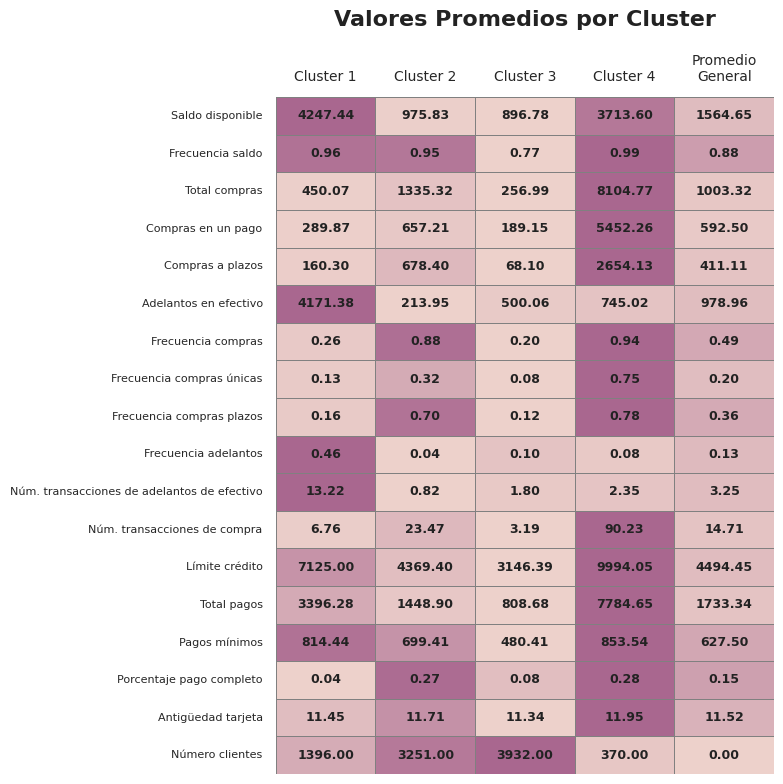

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

variables_es = [
    "Saldo disponible","Frecuencia saldo",  "Total compras", "Compras en un pago",
    "Compras a plazos", "Adelantos en efectivo", "Frecuencia compras",
    "Frecuencia compras únicas","Frecuencia compras plazos", "Frecuencia adelantos",
    "Núm. transacciones de adelantos de efectivo","Núm. transacciones de compra","Límite crédito",
    "Total pagos", "Pagos mínimos", "Porcentaje pago completo",
    "Antigüedad tarjeta", "Número clientes"
]



sns.set_style("white")
colors = LinearSegmentedColormap.from_list('custom', ['#edd1cb', '#a9678f'])
df_normalized = description.sub(description.min(axis=1), axis=0).div(description.max(axis=1) - description.min(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_normalized, cmap=colors, annot=description,
            fmt='.2f', linewidth=0.5, linecolor='gray',
            cbar=False, annot_kws={"size":9, "color":"#222222", "weight":"bold"}, ax=ax)


ax.set_title('Valores Promedios por Cluster', fontsize=16, weight='bold', color='#222222', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(labels= ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', "Promedio\nGeneral"])
ax.set_yticklabels(labels = variables_es)
ax.xaxis.tick_top()
ax.tick_params(axis='x', which='both', labelsize=10, bottom=False, top=False)
ax.tick_params(axis='y', which='both', labelsize=8, rotation=0, left=False)

plt.tight_layout()
plt.show()

In [ ]:
description.T.n_customers*100/dataset.shape[0]

,n_customers
cluster,
cluster_1,15.599508
cluster_2,36.328081
cluster_3,43.937870
cluster_4,4.134540
Promedio general,0.000000


En base a la tabla anterior, podemos concluir que cada cluster posee las siguientes características:


1. **Cluster 1**:  
  - Saldo disponible muy superior al promedio general
  - Actualización constante del saldo en su cuenta  
  - Uso intensivo de adelantos de efectivo  
  - Frecuencia elevada en transacciones con adelantos de efectivo
  - Segundo grupo con límite de crédito más alto del grupo, mayor al promedio general  
  - Realizan pagos por montos considerables  
  - **Número de clientes**: 1,396, cerca del 15.6% del total de clientes

2. **Cluster 2**:  
  - Total de compras por encima del promedio  
  - Preferencia marcada por compras a plazos  
  - Uso casi nulo de adelantos de efectivo  
  - Mejor historial de pagos completos  
  - Límite de crédito moderado, ligeramente menor al promedio general
  - **Número de clientes**: 3,251, cerca del 36.3% del total de clientes.

3. **Cluster 3**:  
  - Saldo disponible más bajo de todos los grupos, inferior al promedio general
  - Actividad de compras mínima  
  - Frecuencia de compras muy reducida  
  - Límite de crédito más restringido  
  - Dependencia de pagos mínimos  
  - Menor cantidad de transacciones registradas  
  - **Número de clientes**: 3,932 (grupo mayoritario), cerca del 43.9% del total de clientes.  

4. **Cluster 4**:  
  - Segundo grupo con mayor saldo disponible, mayor al promedio general
  - Niveles excepcionales en volumen de compras  
  - Compras únicas de alto valor  
  - Frecuencia de compras casi permanente  
  - Límite de crédito más elevado  
  - Pagos totales significativamente altos  
  - Excelente cumplimiento en pagos completos  
  - **Número de clientes**: 370 (grupo exclusivo), cerca del 4.1% del total de clientes.

  ---

De acuerdo a las características destacadas de cada grupo, los grupos pueden ser etiquetados como

1. **Cluster 1:  *Altos saldo y adelantos***
2. **Cluster 2:  *Clientes Resposables***
1. **Cluster 3:  *Clientes Básicos***
4. **Cluster 4:  *Clientes excepcionales, primium o destacadados***



### Visualizando clusters

In [ ]:
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,201.802084,0.000000,12,cluster_3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,856.901546,0.222222,12,cluster_1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,622.066742,0.000000,12,cluster_2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,cluster_3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,678.334763,0.000000,12,cluster_3


#### Saldo disponible vs compras

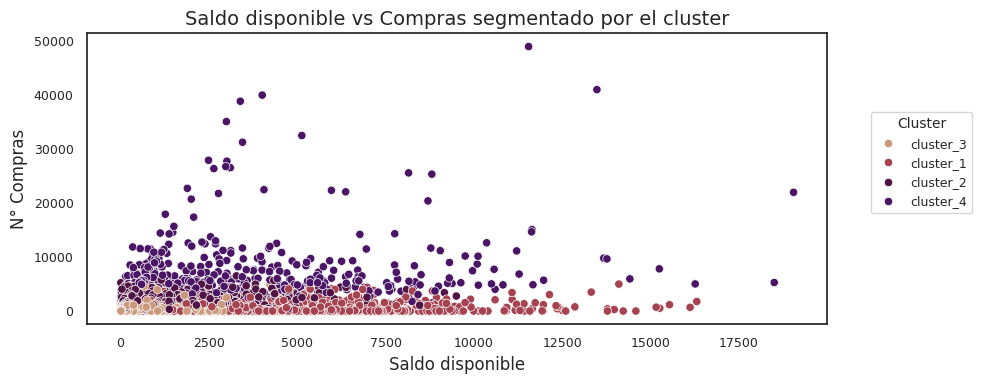

In [ ]:
dict_dea1 = {"title": "Saldo disponible vs Compras segmentado por el cluster",
             "x_label": "Saldo disponible",
             "y_label": "N° Compras",
             "hue": "cluster",
             "hue_title": "Cluster"}

plot_scatter(dataset, "BALANCE", "PURCHASES", **dict_dea1)

#### Saldo disponible vs Límite de Crédito

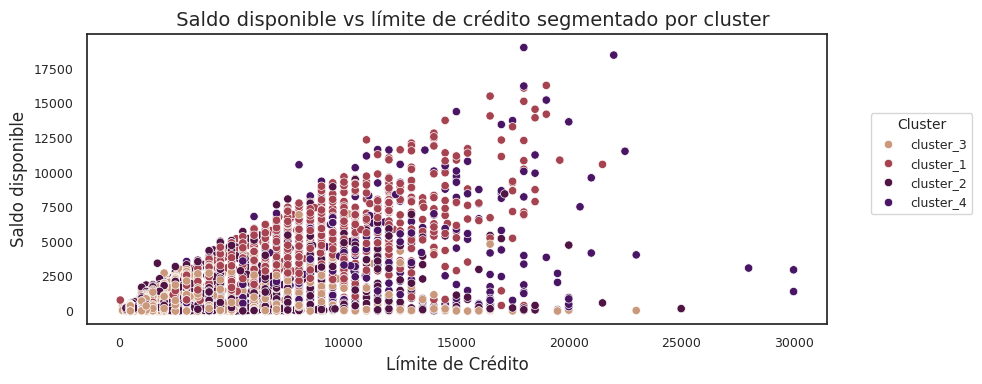

In [ ]:
dict_dea2 = {"title": "     Saldo disponible vs límite de crédito segmentado por cluster",
             "x_label": "Límite de Crédito",
             "y_label": "Saldo disponible",
             "hue": "cluster",
             "hue_title": "Cluster"}

plot_scatter(dataset, "CREDIT_LIMIT", "BALANCE", **dict_dea2)

#### Limite de Crédito vs Número de Compras

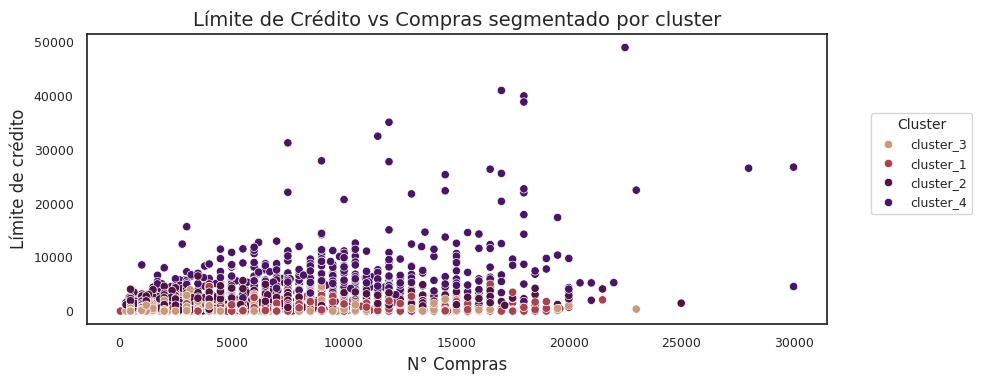

In [ ]:
dict_dea3 = {"title": "Límite de Crédito vs Compras segmentado por cluster",
             "x_label": "N° Compras",
             "y_label": "Límite de crédito",
             "hue": "cluster",
             "hue_title": "Cluster"}

plot_scatter(dataset,  "CREDIT_LIMIT", "PURCHASES",**dict_dea3)

#### Cantidad de pagos vs Adelantos con Efectivos

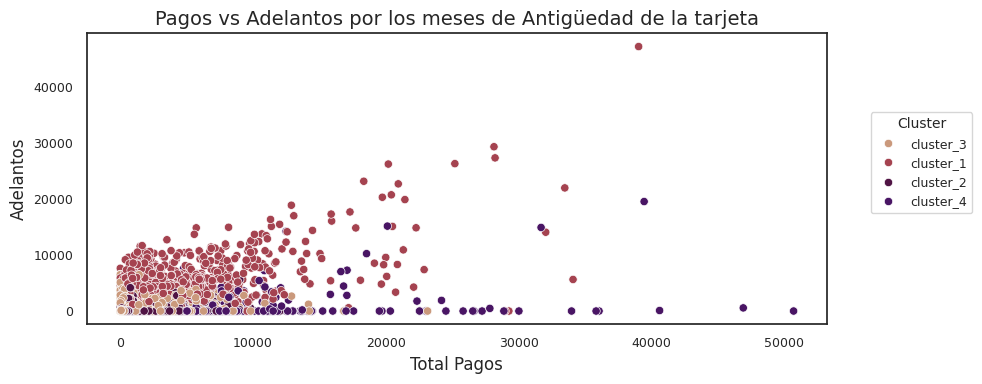

In [ ]:
dict_dea3 = {"title": "Pagos vs Adelantos por los meses de Antigüedad de la tarjeta",
             "x_label": "Total Pagos",
             "y_label": "Adelantos",
             "hue": "cluster",
             "hue_title": "Cluster"}

plot_scatter(dataset,  "PAYMENTS", "CASH_ADVANCE",**dict_dea3)

#### Visualización con las principales dos componentes

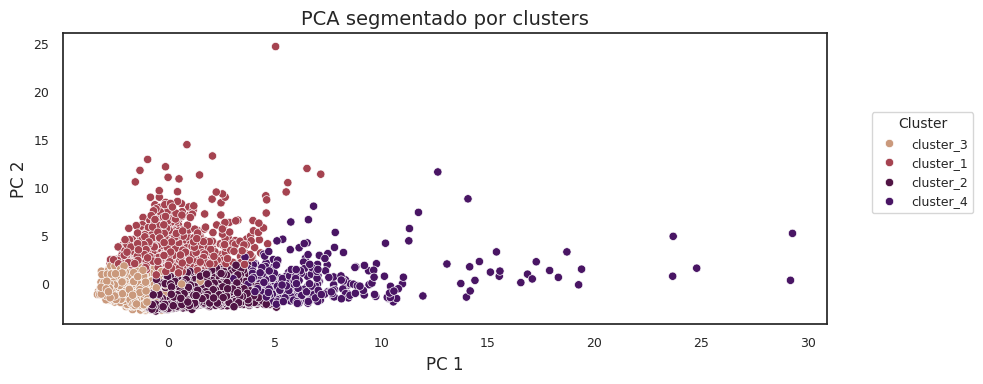

In [ ]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X)

X_pca_2 = pd.DataFrame(X_pca_2,
                      columns = ["PC{}".format(i+1) for i in range(X_pca_2.shape[1])])

X_pca_2["cluster"] = labels + 1
X_pca_2.cluster = "cluster_" + X_pca_2.cluster.astype(str)

dict_pca = {"title": "PCA segmentado por clusters",
             "x_label": "PC 1",
             "y_label": "PC 2",
             "hue": "cluster",
             "hue_title": "Cluster"}

plot_scatter(X_pca_2,  "PC1", "PC2",**dict_pca)